<figure>
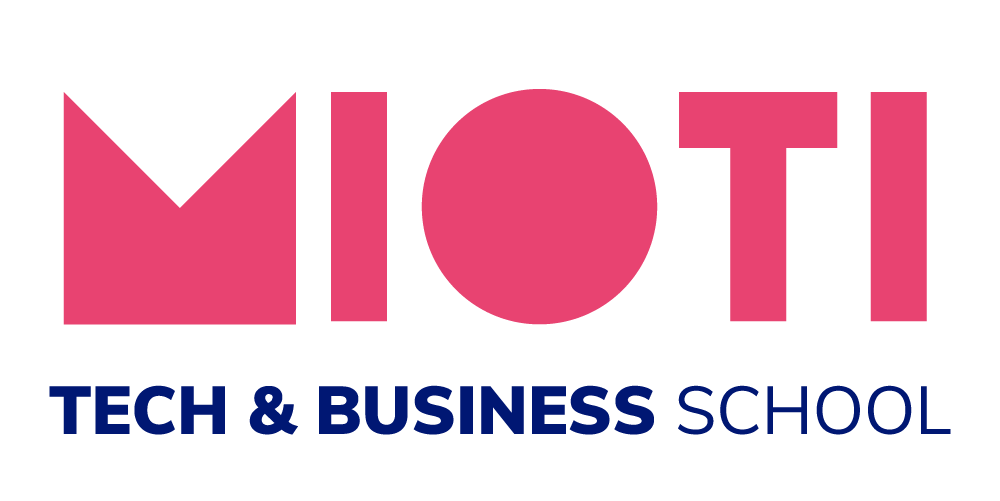
<figcaption></figure>

# Predictive Analytics

### Time Series Clustering - KMeans Model

## Objective

In this exercise, we will work with a time series dataset from the retail sector. The dataset contains multiple time series, each representing a different product type, each series shows the amount sold for a particular product on a specific day, with the possibility of negative values indicating returns.

## 1. Environment Setup
Let's load the libraries that we will use for the challenge.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tslearn
import time

from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import TimeSeriesKMeans, silhouette_score

# optional - suppress warnings

import warnings
warnings.filterwarnings("ignore")

## 2. Data Loading and Preprocessig

Loading our dataframe as *df_items*

In [6]:
df_pivoted = pd.read_csv('df_cluster.csv')
df_pivoted.head(10)

,StockCode,2009-12-01 00:00:00,2009-12-02 00:00:00,2009-12-03 00:00:00,2009-12-04 00:00:00,2009-12-05 00:00:00,2009-12-06 00:00:00,2009-12-07 00:00:00,2009-12-08 00:00:00,2009-12-09 00:00:00,...,2010-11-30 00:00:00,2010-12-01 00:00:00,2010-12-02 00:00:00,2010-12-03 00:00:00,2010-12-04 00:00:00,2010-12-05 00:00:00,2010-12-06 00:00:00,2010-12-07 00:00:00,2010-12-08 00:00:00,2010-12-09 00:00:00
0,10002,12.0,0.0,7.0,73.0,0.0,49.0,2.0,12.0,0.0,...,12.0,60.0,1.0,8.0,0.0,1.0,25.0,8.0,13.0,44.0
1,10080,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10109,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10120,60.0,10.0,0.0,30.0,0.0,0.0,0.0,1.0,1.0,...,10.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,0.0
4,10125,5.0,0.0,0.0,46.0,0.0,8.0,20.0,1.0,22.0,...,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,40.0,0.0
5,10133,6.0,0.0,40.0,25.0,10.0,4.0,16.0,20.0,0.0,...,0.0,5.0,0.0,1.0,0.0,14.0,2.0,0.0,0.0,12.0
6,10134,0.0,0.0,13.0,0.0,10.0,0.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,10135,17.0,20.0,14.0,10.0,0.0,0.0,20.0,0.0,0.0,...,0.0,1.0,10.0,1.0,0.0,11.0,0.0,8.0,3.0,11.0
8,10138,0.0,96.0,35.0,12.0,0.0,12.0,12.0,-192.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,11001,2.0,69.0,2.0,0.0,0.0,0.0,5.0,1.0,5.0,...,16.0,3.0,0.0,0.0,0.0,15.0,1.0,0.0,32.0,1.0


In [7]:
df_pivoted.set_index('StockCode', inplace=True)
print(df_pivoted.shape, df_pivoted.columns)

(4605, 374) Index(['2009-12-01 00:00:00', '2009-12-02 00:00:00', '2009-12-03 00:00:00',
       '2009-12-04 00:00:00', '2009-12-05 00:00:00', '2009-12-06 00:00:00',
       '2009-12-07 00:00:00', '2009-12-08 00:00:00', '2009-12-09 00:00:00',
       '2009-12-10 00:00:00',
       ...
       '2010-11-30 00:00:00', '2010-12-01 00:00:00', '2010-12-02 00:00:00',
       '2010-12-03 00:00:00', '2010-12-04 00:00:00', '2010-12-05 00:00:00',
       '2010-12-06 00:00:00', '2010-12-07 00:00:00', '2010-12-08 00:00:00',
       '2010-12-09 00:00:00'],
      dtype='object', length=374)


To ensure that the clustering process takes minimal time, we will only the first 100 rows of the dataframe

In [8]:
df_100_pivoted = df_pivoted.head(100)

In [9]:
df_100_pivoted.shape

(100, 374)

## 3. Spliting the dataset in test and train

Now, let's normalize the time series data so that it has a mean of 0 and a standard deviation of 1. To simplify the process, we will work with all 100 series at once, there's no need to create a train-test split.

In [10]:
scaler = TimeSeriesScalerMeanVariance()
X_train = scaler.fit_transform(df_100_pivoted)

In [11]:
X_train.mean(axis=1)

array([[ 4.74961722e-18],
       [ 1.42488517e-17],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-4.27465550e-17],
       [ 4.74961722e-18],
       [-1.42488517e-17],
       [ 0.00000000e+00],
       [ 2.84977033e-17],
       [ 0.00000000e+00],
       [-1.42488517e-17],
       [ 5.46205980e-17],
       [ 0.00000000e+00],
       [ 1.89984689e-17],
       [ 9.49923444e-18],
       [ 3.79969377e-17],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-3.32473205e-17],
       [-3.32473205e-17],
       [ 7.12442583e-18],
       [ 3.32473205e-17],
       [-2.84977033e-17],
       [-3.91843420e-17],
       [-1.89984689e-17],
       [ 5.69954066e-17],
       [-3.08725119e-17],
       [-1.42488517e-17],
       [ 9.49923444e-18],
       [-1.89984689e-17],
       [-1.42488517e-17],
       [-9.49923444e-18],
       [-4.74961722e-18],
       [-2.37480861e-18],
       [-2.84977033e-17],
       [-9.49923444e-18],
       [ 4.74961722e-18],
       [ 4.74961722e-18],
       [-1.0

In [12]:
X_train.std(axis=1)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [13]:
X_train.shape

(100, 374, 1)

Let's use k-means clustering with 3 clusters using the Euclidean metric

In [14]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
km_euc = TimeSeriesKMeans(n_clusters=3, 
                          n_init=10, 
                          metric="euclidean", init="random", random_state=1)
km_euc.fit(X_train)

TimeSeriesKMeans(init='random', n_init=10, random_state=1)

In [15]:
labels_euc = km_euc.labels_
labels_euc

array([2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 0, 2, 1, 1, 1, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2], dtype=int64)

In order to visualize the time series for each cluster, we will create a function to plot each one of them in a graphic with the centroids in maked in red.

In [16]:
def plot_groups(model):  
    labels = model.labels_

    plt.figure(figsize=(10, 10))
    for yi in range(3):
        plt.subplot(3, 1, 1 + yi)
        for xx in X_train[labels == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.15)
        plt.plot(model.cluster_centers_[yi].ravel(), "r-")
        plt.xlim(0, 374-1)

        plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
        if yi == 0:
            plt.title("$k$-means")

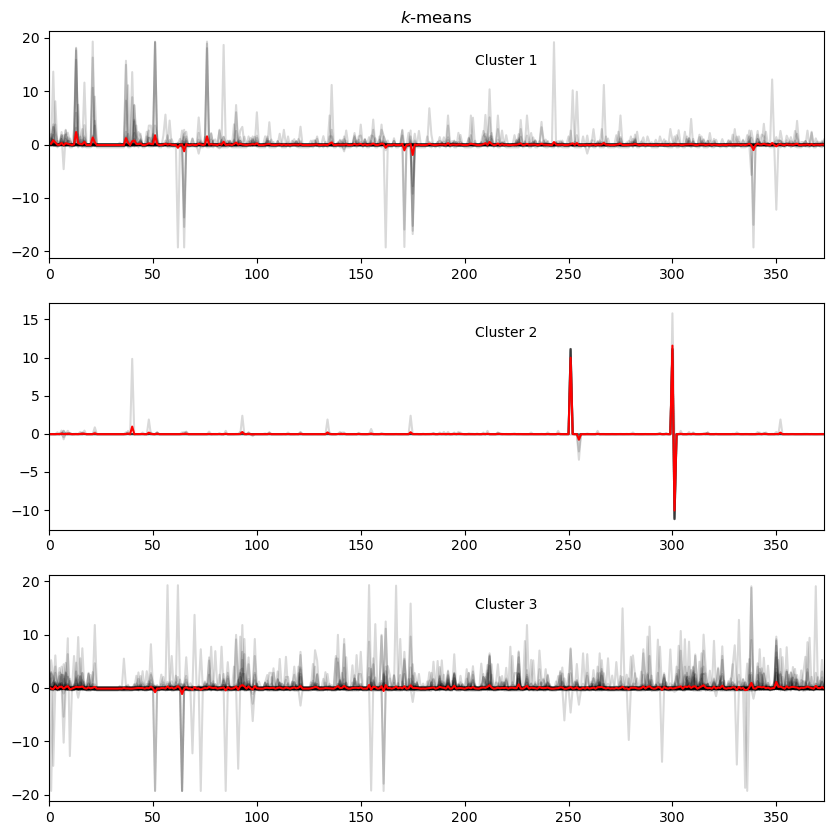

In [17]:
plot_groups(km_euc)

We will repeat, below, the previous steps (model fitting and visualization), but now using the Dynamic Time Warping (DTW) metric. Note that this process will take significantly longer.

To perform k-means clustering with DTW, we will use the TimeSeriesKMeans class from the tslearn library, which supports DTW as a metric.

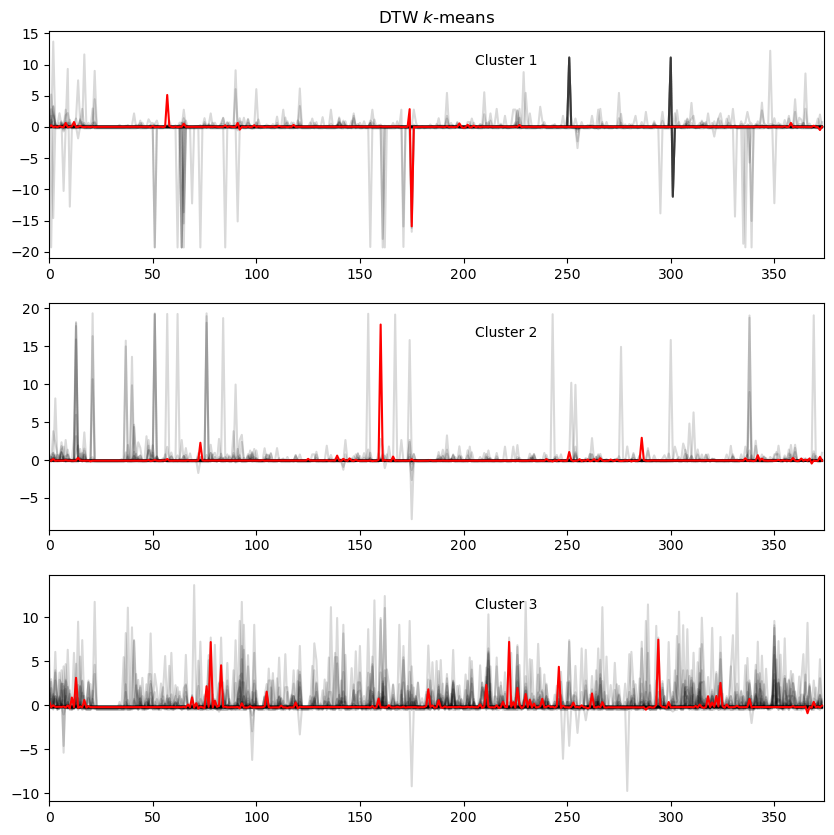

In [18]:
km_dtw = TimeSeriesKMeans(n_clusters=3,
                          metric="dtw",
                          init="random",
                          random_state=42)
y_pred = km_dtw.fit_predict(X_train)

plt.figure(figsize=(10, 10))
for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.15)
    plt.plot(km_dtw.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 374)

    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 0:
        plt.title("DTW $k$-means")

Considering all the clusters found, let's identify the products that consistently have the highest sales over time. These products should belong to the cluster where the time series data shows consistently high (positive) sales compared to other clusters.

In  this case: **Cluster 2 / Label 1**.

In [19]:
km_dtw.labels_

array([2, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2,
       2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2,
       2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 1, 2, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

In [20]:
labels_km_dtw = km_dtw.labels_

In [21]:
df_100_pivoted['Cluster'] = labels_km_dtw

In [22]:
df_100_pivoted

,2009-12-01 00:00:00,2009-12-02 00:00:00,2009-12-03 00:00:00,2009-12-04 00:00:00,2009-12-05 00:00:00,2009-12-06 00:00:00,2009-12-07 00:00:00,2009-12-08 00:00:00,2009-12-09 00:00:00,2009-12-10 00:00:00,...,2010-12-01 00:00:00,2010-12-02 00:00:00,2010-12-03 00:00:00,2010-12-04 00:00:00,2010-12-05 00:00:00,2010-12-06 00:00:00,2010-12-07 00:00:00,2010-12-08 00:00:00,2010-12-09 00:00:00,Cluster
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,12.0,0.0,7.0,73.0,0.0,49.0,2.0,12.0,0.0,1.0,...,60.0,1.0,8.0,0.0,1.0,25.0,8.0,13.0,44.0,2
10080,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10109,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10120,60.0,10.0,0.0,30.0,0.0,0.0,0.0,1.0,1.0,6.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,0.0,0
10125,5.0,0.0,0.0,46.0,0.0,8.0,20.0,1.0,22.0,0.0,...,2.0,0.0,0.0,0.0,0.0,3.0,0.0,40.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
20668,0.0,336.0,240.0,49.0,48.0,264.0,45.0,0.0,68.0,1052.0,...,344.0,34.0,81.0,0.0,24.0,48.0,0.0,241.0,25.0,0
20669,0.0,10.0,1.0,0.0,0.0,2.0,2.0,0.0,6.0,2.0,...,2.0,0.0,12.0,0.0,0.0,2.0,3.0,2.0,0.0,2


**Finally, these are the products that belong to Cluster 2:**

In [23]:
df_100_pivoted.loc[df_100_pivoted['Cluster'] == 1]

,2009-12-01 00:00:00,2009-12-02 00:00:00,2009-12-03 00:00:00,2009-12-04 00:00:00,2009-12-05 00:00:00,2009-12-06 00:00:00,2009-12-07 00:00:00,2009-12-08 00:00:00,2009-12-09 00:00:00,2009-12-10 00:00:00,...,2010-12-01 00:00:00,2010-12-02 00:00:00,2010-12-03 00:00:00,2010-12-04 00:00:00,2010-12-05 00:00:00,2010-12-06 00:00:00,2010-12-07 00:00:00,2010-12-08 00:00:00,2010-12-09 00:00:00,Cluster
StockCode,,,,,,,,,,,,,,,,,,,,,
10080,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10133,6.0,0.0,40.0,25.0,10.0,4.0,16.0,20.0,0.0,10.0,...,5.0,0.0,1.0,0.0,14.0,2.0,0.0,0.0,12.0,1
10134,0.0,0.0,13.0,0.0,10.0,0.0,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10135,17.0,20.0,14.0,10.0,0.0,0.0,20.0,0.0,0.0,0.0,...,1.0,10.0,1.0,0.0,11.0,0.0,8.0,3.0,11.0,1
16010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,1
16044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
16048,0.0,0.0,0.0,0.0,0.0,0.0,2.0,24.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
16049,0.0,0.0,0.0,432.0,0.0,0.0,0.0,0.0,144.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
16051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
